In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import pandas as pd
from matplotlib import rc
import os.path as path
import os


Álgebra Lineal

3.

In [30]:
def Multiplica(m_1, m_2):
    resp=np.dot(m_1,m_2)
    
    return resp

In [31]:
a=np.array([[1,0,0],[5,1,0],[-2,3,1]])
b=np.array([[4,-2,1],[0,3,7],[0,0,2]])

a,b

(array([[ 1,  0,  0],
        [ 5,  1,  0],
        [-2,  3,  1]]),
 array([[ 4, -2,  1],
        [ 0,  3,  7],
        [ 0,  0,  2]]))

In [32]:
Multiplica(a,b)

array([[ 4, -2,  1],
       [20, -7, 12],
       [-8, 13, 21]])

4.

Sustitución hacia adelante:

Partiendo de un sistema de ecuaciones $Ax=b$ se utiliza la factorización $LU$ para tener $A=LU$, donde $L$ es una matriz triangular superior y $U$ es una matriz triangular inferior. Para la sustitución hacia adelante se utiliza la matriz triangular inferior. De modo que se tiene,

$$\begin{pmatrix}
L_{00} & 0 & 0 & \cdots & \cdots & 0 & 0\\
L_{10} & L_{11} & 0 & \cdots & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
L_{i1} & L_{i2} & \cdots & L_{ii} & 0 &\cdots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
L_{n1} & L_{n2} & \cdots & \cdots &\cdots &\cdots & L_{nn}
\end{pmatrix}
\begin{pmatrix}
x_{0} \\
x_{1} \\
\vdots \\
x_{i}\\
\vdots \\
x_{n}
\end{pmatrix}
=
\begin{pmatrix}
b_{0} \\
b_{1} \\
\vdots \\
b_{i}\\
\vdots \\
b_{n}
\end{pmatrix}$$
$$ $$
De modo que los sistemas de ecuaciones estarían dados por,


$$b_{0}=L_{00}x_{0}$$
$$x_{0}=\frac{b_{0}}{L_{00}}$$
$$ $$
$$b_{1}=L_{10}x_{0} + L_{11}x_{1}$$
$$x_{1}=\frac{b_{1}-L_{10}x_{0}}{L_{11}}$$
$$\cdots$$
$$b_{i}=L_{i0}x_{0} + L_{i1}x_{1}+\cdots+L_{ii}x_{i}$$
$$x_{i}=\frac{b_{i}-L_{i0}x_{0}-L_{i1}x_{1} - \cdots - L_{i i-1}x_{i-1}}{L_{ii}}$$
$$ $$
Obteniendo la fórmula de sustitución hacia adelante:

$$x_{i}= \frac{b_{i} -\sum_{j=0}^{i-1}L_{ij}x_{j}}{L_{ii}}$$




5.

Sustitución hacia atras:

Como se mencionó en el punto anterior, se hace uso de la factorización $LU$, pero en el caso de la sustitución hacia atrás, se utiliza la matriz triangular superior. De modo que se tiene,

$$\begin{pmatrix}
L_{11} & L_{12} & L_{13} & \cdots & \cdots & L_{1 n-1} & L_{1n}\\
0 & L_{22} & L_{23} & \cdots & \cdots & L_{2 n-1} & L_{2n}\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
0 & 0 & \cdots & L_{ii} & L_{i i+1} &\cdots & L_{in}\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
0 & 0 & \cdots & \cdots &\cdots &\cdots & L_{nn}
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{i}\\
\vdots \\
x_{n}
\end{pmatrix}
=
\begin{pmatrix}
b_{1} \\
b_{2} \\
\vdots \\
b_{i}\\
\vdots \\
b_{n}
\end{pmatrix}$$

De modo que los sistemas de ecuaciones estarían dados por,


$$b_{0}=L_{00}x_{0}+L_{01}x_{1}+\cdots+L_{0n}x_{n}$$
$$x_{0}=\frac{b_{0}-L_{01}x_{1}-\cdots-L_{0 n}x_{n}}{L_{00}}$$
$$ $$
$$b_{1}=L_{11}x_{1}+L_{12}x_{2}+\cdots+L_{1n}x_{n}$$
$$x_{1}=\frac{b_{1}-L_{12}x_{2}-\cdots-L_{1 n}x_{n}}{L_{11}}$$
$$\cdots$$
$$b_{i}=L_{ii}x_{i}+\cdots+L_{in}x_{n}$$
$$x_{i}=\frac{b_{i}-L_{i i+1}x_{i+1}-\cdots-L_{i n}x_{n}}{L_{ii}}$$


Obteniendo la fórmula de sustitución hacia adelante:

$$x_{i}= \frac{b_{i} -\sum_{j=i+1}^{n}L_{ij}x_{j}}{L_{ii}}$$


6.

In [33]:
A=np.array([[3.,-1.,-1.],[-1.,3.,1.],[2.,1.,4.]])
b=np.array([1.,3.,7.])


In [34]:
ws=np.linspace(1e-9,2,100)
x=np.array([0.,0.,0.])

def SOR(A, x, b, w, itmax = 1000, tolerance = 1e-9):

    x_=x.copy()
    termine=0

    for it in range(itmax):
        for i in range(len(x)):
            suma = 0.
            for j in range(len(x)):
                
                if j != i:
                    suma += A[i, j]*x_[j]
                    
            x_[i] = (1 - w)*x_[i] + (w/A[i, i])*(b[i] - suma)
            
        dot=np.dot(A,x_)-b    
        norma=np.linalg.norm(dot)
        
        if norma > 1e+10:
            termine = 1

        if np.allclose(norma,tolerance,atol=tolerance):
            break
            
    resp=(x_,termine,it)
            
    return resp

            

In [35]:
w_min = 1e+10
min_it = 1e+10
for w in ws:
    data = SOR(A, x, b, w)
    if data[1] == 0:
        if min_it > data[2]:
            min_it = data[2]
            w_min = w
            
w_min,min_it
            


C:\Users\lsper\AppData\Local\Temp/ipykernel_22212/3805537477.py:15: RuntimeWarning: overflow encountered in double_scalars
  suma += A[i, j]*x_[j]
C:\Users\lsper\AppData\Local\Temp/ipykernel_22212/3805537477.py:15: RuntimeWarning: invalid value encountered in double_scalars
  suma += A[i, j]*x_[j]


(0.9898989904040403, 14)

7.

In [36]:
A=np.array([[4,-2,1],[20,-7,12],[-8,13,17]])
A

array([[ 4, -2,  1],
       [20, -7, 12],
       [-8, 13, 17]])

In [37]:
n = len(A)
L = np.eye(n)
U = np.copy(A)
L

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [38]:
for j in range(n-1):
    for i in range(j+1, n):
        valor = U[i, j] / U[j, j]
        L[i, j] = valor
        U[i, j:] = U[i, j:] - valor * U[j, j:]

In [39]:
L,U

(array([[ 1.,  0.,  0.],
        [ 5.,  1.,  0.],
        [-2.,  3.,  1.]]),
 array([[ 4, -2,  1],
        [ 0,  3,  7],
        [ 0,  0, -2]]))

9.

a)

In [40]:
A=np.array([[4,1,1],[1,3,2],[1,2,5]])


In [41]:
def Jacobi(A, itmax=1000):
    
    Vec=np.identity(A.shape[0])
    for it in range(itmax):
        maxi=0
        
        for i in range(A.shape[0]):
            
            for j in range(A.shape[1]):
                
                if j!=i:
                    if maxi< A[i,j]:
                        maxi=A[i,j]
                        p=i
                        q=j
        
        if p==q:
            theta=np.pi/4
                        
        else:
            theta=(1/2)*np.arctan((2*A[p,q])/(A[p,p] - A[q,q]))
            
        M=np.identity(A.shape[0])      
        M[p,p]=np.cos(theta)
        M[q,q]=np.cos(theta)
        M[p,q]=-np.sin(theta)
        M[q,p]=np.sin(theta)
         
            
        A=M.T @ A @ M
        Vec= Vec @ M
            
        values=A.diagonal()
 
    return values, Vec




In [42]:

Jacobi(A)

(array([3.39729482, 1.70759867, 6.89510652]),
 array([[ 0.8856695 , -0.17094212,  0.43170398],
        [-0.07555865,  0.86430837,  0.49725438],
        [-0.45812708, -0.47302201,  0.75257541]]))

b)

In [43]:
resp=np.linalg.eig(A)
resp

(array([6.89510652, 3.39729507, 1.70759841]),
 array([[ 0.43170413,  0.88573564,  0.17059871],
        [ 0.49725362, -0.07589338, -0.86427949],
        [ 0.75257583, -0.45794385,  0.47319874]]))

10.

In [44]:
H = np.array([[1, 2, -1], [1,0, -1], [4, -4, 5]])
v_i=-np.random.rand(3)



In [45]:
def Valor_Vector_propios(v,H,itmax=1000,tolerancia=1e-14):
    
    value=0
    vn=v/np.linalg.norm(v)
    
    for it in range(itmax):
        
        v_0=np.linalg.solve(H,vn)
        v_0=v_0/np.linalg.norm(v_0)
        
        value_i=np.dot(v_0,vn)
                       
        if np.abs(value-value_i)<tolerancia:
            break
        
        value=value_i    
        vn=v_0
        
    eig_val=-1/value
    eig_vec=vn
                       
    return eig_val,eig_vec

EigVal,EigVec=Valor_Vector_propios(v_i,H)
EigVal,EigVec


(1.000000000000005, array([ 0.31977762, -0.69907892, -0.63955527]))

12.

a)

In [46]:
x=sym.Symbol('x',real=True)

h=sym.Symbol('h',real=True)

X=[-2*h,-1*h,0*h,1*h,2*h]

def Lagrange(x,xi,j):
    
    prod = 1
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [47]:
def GetCoefficients(x,p,X):
    coefficients=[]
    
    for i in range(len(X)):
        Li=Lagrange(x,X,i)
        
        dLi=sym.diff(Li,x,1)
        
        C=dLi.subs(x,X[p])
        
        coefficients.append(C)
        
    return coefficients

In [48]:
coef=GetCoefficients(x,0,X)
coef

[-25/(12*h), 4/h, -3/h, 4/(3*h), -1/(4*h)]

In [49]:
def GetJacobian_4(G,r,h):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (G[i]( r[0] - 2*h,r[1],r[2]) - 8*G[i]( r[0] - h,r[1],r[2])+8*G[i]( r[0] +h,r[1],r[2]) - G[i]( r[0] + 2*h,r[1],r[2]))/(12*h)
        J[i,1] = (G[i]( r[0] ,r[1]-2*h,r[2]) - 8*G[i]( r[0],r[1]-h,r[2])+8*G[i]( r[0] ,r[1]+h,r[2]) - G[i]( r[0],r[1]+2*h,r[2]))/(12*h)
        J[i,2] = (G[i]( r[0],r[1],r[2]-2*h) - 8*G[i]( r[0],r[1],r[2]-h)+8*G[i]( r[0],r[1],r[2]+h) - G[i]( r[0],r[1],r[2]+2*h))/(12*h)
        
    return J.T



b)

In [50]:
G=(lambda x_1,x_2,x_3: 6*x_1 - 2*np.cos(x_2*x_3) - 1., \
    lambda x_1,x_2,x_3: 9*x_2 + (x_1**2 + np.sin(x_3) + 1.06)**(1/2) +0.9, \
    lambda x_1,x_2,x_3: 60*x_3 + 3*np.e**(-x_1*x_2)+10*np.pi -3)

In [51]:
GetJacobian_4(G,(0.5,0.5,0.5),0.01)


array([[ 6.        ,  0.37377753, -1.16820117],
       [ 0.24740396,  9.        , -1.16820117],
       [ 0.24740396,  0.32802064, 60.        ]])

c)

In [52]:
def GetJacobian_2(G,r,h):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (G[i]( r[0] + h,r[1],r[2]) - G[i]( r[0] - h,r[1],r[2]))/(2*h)
        J[i,1] = (G[i]( r[0] ,r[1]+h,r[2]) - G[i]( r[0],r[1]-h,r[2]))/(2*h)
        J[i,2] = (G[i]( r[0],r[1],r[2]+h) - G[i]( r[0],r[1],r[2]-h))/(2*h)
        
    return J.T

GetJacobian_2(G,(0.5,0.5,0.5),0.01)

array([[ 6.        ,  0.37376854, -1.16820604],
       [ 0.24740293,  9.        , -1.16820604],
       [ 0.24740293,  0.32801836, 60.        ]])

Usando $h=0.00001$ se logra igualar en precisión al operador de cuarto orden.

In [53]:
GetJacobian_2(G,(0.5,0.5,0.5),0.00001)

array([[ 6.        ,  0.37377753, -1.16820117],
       [ 0.24740396,  9.        , -1.16820117],
       [ 0.24740396,  0.32802064, 60.        ]])

13.

In [54]:
J_x=sym.matrices.Matrix([[0,0,0],[0,0,-1],[0,1,0]])
J_y=sym.matrices.Matrix([[0,0,1],[0,0,0],[-1,0,0]])
J_z=sym.matrices.Matrix([[0,-1,0],[1,0,0],[0,0,0]])

J_x,J_y,J_z

(Matrix([
 [0, 0,  0],
 [0, 0, -1],
 [0, 1,  0]]),
 Matrix([
 [ 0, 0, 1],
 [ 0, 0, 0],
 [-1, 0, 0]]),
 Matrix([
 [0, -1, 0],
 [1,  0, 0],
 [0,  0, 0]]))

Realizando todas las posibles combinaciones para A y B a partir de J_x, J_y, J_z:


Para J_x y J_y:

In [55]:
J_x*J_y - J_y*J_x

Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 0]])

Se cumple que  $[J_{x},J_{y}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=1$ y 
$$J_{z}=\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} $$

Para J_x y J_z:

In [56]:
J_x*J_z - J_z*J_x

Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]])

Se cumple que  $[J_{x},J_{z}]=\epsilon_{ijk}J_{y}$ ya que $\epsilon_{xyz}=-1$ y 
$$J_{y}=\begin{pmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{pmatrix} $$

Para J_y y J_x:

In [57]:
J_y*J_x - J_x*J_y

Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 0]])

Se cumple que  $[J_{y},J_{x}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=-1$ y 
$$J_{z}=\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} $$

Para J_y y J_z:

In [58]:
J_y*J_z - J_z*J_y

Matrix([
[0, 0,  0],
[0, 0, -1],
[0, 1,  0]])

Se cumple que  $[J_{y},J_{z}]=\epsilon_{ijk}J_{x}$ ya que $\epsilon_{xyz}=1$ y 
$$J_{x}=\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} $$

Para J_z y J_x:

In [59]:
J_z*J_x - J_x*J_z

Matrix([
[ 0, 0, 1],
[ 0, 0, 0],
[-1, 0, 0]])

Se cumple que  $[J_{z},J_{x}]=\epsilon_{ijk}J_{y}$ ya que $\epsilon_{xyz}=1$ y 
$$J_{y}=\begin{pmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{pmatrix} $$

Para J_z y J_x:

In [60]:
J_z*J_y - J_y*J_z

Matrix([
[0,  0, 0],
[0,  0, 1],
[0, -1, 0]])

Se cumple que  $[J_{z},J_{y}]=\epsilon_{ijk}J_{x}$ ya que $\epsilon_{xyz}=-1$ y 
$$J_{x}=\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} $$

Para J_x y J_x:

In [61]:
J_x*J_x - J_x*J_x

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{x},J_{x}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$ 

Para J_y y J_y:

In [62]:
J_y*J_y - J_y*J_y

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{y},J_{y}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$ 

Para J_z y J_z:

In [63]:
J_z*J_z - J_z*J_z

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{y},J_{y}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$ 

14.

In [64]:
sigma_x = sym.matrices.Matrix([[0,1],[1,0]])
sigma_y = sym.matrices.Matrix([[0,-1j],[1j,0]])
sigma_z = sym.matrices.Matrix([[1,0],[0,-1]])
sigma_x,sigma_y,sigma_z

(Matrix([
 [0, 1],
 [1, 0]]),
 Matrix([
 [    0, -1.0*I],
 [1.0*I,      0]]),
 Matrix([
 [1,  0],
 [0, -1]]))

Para $\sigma_{x}$ y $\sigma_{y}$

In [65]:
sigma_x*sigma_y- sigma_y*sigma_x

Matrix([
[2.0*I,      0],
[    0, -2.0*I]])

Se cumple que  $[\sigma_{x},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{x}=\begin{pmatrix}
 1 & 0 \\
 0 & -1 
\end{pmatrix} $$

Para $\sigma_{x}$ y $\sigma_{z}$

In [66]:
sigma_x*sigma_z- sigma_z*sigma_x

Matrix([
[0, -2],
[2,  0]])

Se cumple que  $[\sigma_{x},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{y}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{y}=\begin{pmatrix}
 0 & -i \\
 i & 0 
\end{pmatrix} $$

Para $\sigma_{y}$ y $\sigma_{x}$

In [67]:
sigma_y*sigma_x- sigma_x*sigma_y

Matrix([
[-2.0*I,     0],
[     0, 2.0*I]])

Se cumple que  $[\sigma_{y},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{z}=\begin{pmatrix}
 1 & 0 \\
 0 & -1 
\end{pmatrix} $$

Para $\sigma_{y}$ y $\sigma_{z}$

In [68]:
sigma_y*sigma_z- sigma_z*sigma_y

Matrix([
[    0, 2.0*I],
[2.0*I,     0]])

Se cumple que  $[\sigma_{y},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{x}=\begin{pmatrix}
 0 & 1 \\
 1 & 0 
\end{pmatrix} $$

Para $\sigma_{z}$ y $\sigma_{x}$

In [69]:
sigma_z*sigma_x- sigma_x*sigma_z

Matrix([
[ 0, 2],
[-2, 0]])

Se cumple que  $[\sigma_{z},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{y}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{y}=\begin{pmatrix}
 0 & -i \\
 i& 0 
\end{pmatrix} $$

Para $\sigma_{z}$ y $\sigma_{y}$

In [70]:
sigma_z*sigma_y- sigma_y*sigma_z

Matrix([
[     0, -2.0*I],
[-2.0*I,      0]])

Se cumple que  $[\sigma_{z},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{x}=\begin{pmatrix}
 0 & 1 \\
 1& 0 
\end{pmatrix} $$

Para $\sigma_{x}$ y $\sigma_{x}$

In [71]:
sigma_x*sigma_x- sigma_x*sigma_x

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{x},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=0$

Para $\sigma_{y}$ y $\sigma_{y}$

In [72]:
sigma_y*sigma_y- sigma_y*sigma_y

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{y},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=0$

Para $\sigma_{z}$ y $\sigma_{z}$

In [73]:
sigma_z*sigma_z- sigma_z*sigma_z

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{z},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=0$

15. 

In [74]:
gamma_0 = sym.matrices.Matrix([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma_1 = sym.matrices.Matrix([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma_2 = sym.matrices.Matrix([[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]])
gamma_3 = sym.matrices.Matrix([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])

gamma_0, gamma_1,gamma_2,gamma_3

(Matrix([
 [1, 0,  0,  0],
 [0, 1,  0,  0],
 [0, 0, -1,  0],
 [0, 0,  0, -1]]),
 Matrix([
 [ 0,  0, 0, 1],
 [ 0,  0, 1, 0],
 [ 0, -1, 0, 0],
 [-1,  0, 0, 0]]),
 Matrix([
 [     0,     0,     0, -1.0*I],
 [     0,     0, 1.0*I,      0],
 [     0, 1.0*I,     0,      0],
 [-1.0*I,     0,     0,      0]]),
 Matrix([
 [ 0, 0, 1,  0],
 [ 0, 0, 0, -1],
 [-1, 0, 0,  0],
 [ 0, 1, 0,  0]]))

Para $\gamma^0$ y $\gamma^1$

In [75]:
gamma_0*gamma_1+gamma_1*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^0$ y $\gamma^2$

In [76]:
gamma_0*gamma_2+gamma_2*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^0$ y $\gamma^3$

In [77]:
gamma_0*gamma_3+gamma_3*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^0$ y $\gamma^3$

In [78]:
gamma_0*gamma_3+gamma_3*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^1$ y $\gamma^0$

In [79]:
gamma_1*gamma_0+gamma_0*gamma_1

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^1$ y $\gamma^2$


In [80]:
gamma_1*gamma_2+gamma_2*gamma_1

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^1$ y $\gamma^3$

In [81]:
gamma_1*gamma_3+gamma_3*gamma_1

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^2$ y $\gamma^0$

In [82]:
gamma_2*gamma_0+gamma_0*gamma_2

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^2$ y $\gamma^1$

In [83]:
gamma_2*gamma_1+gamma_1*gamma_2

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^2$ y $\gamma^3$

In [84]:
gamma_2*gamma_3+gamma_3*gamma_2


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^3$ y $\gamma^0$

In [85]:
gamma_3*gamma_0+gamma_0*gamma_3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^3$ y $\gamma^1$

In [86]:
gamma_3*gamma_1+gamma_1*gamma_3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^3$ y $\gamma^2$

In [87]:
gamma_3*gamma_2+gamma_2*gamma_3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para todos las relaciones don $i\neq$j se cumple que  $[\gamma^\mu,\gamma^\nu]=2\eta^{\mu \nu}I_{4x4} $ ya que $$\eta^{\mu \nu}=\begin{pmatrix}
 1 & 0 & 0 & 0 \\
 0 & -1 & 0 & 0\\
 0 & 0 & -1 & 0\\
 0 & 0 & 0 & -1
\end{pmatrix} $$
y $$ I_{4x4}=\begin{pmatrix}
 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0\\
 0 & 0 & 1 & 0\\
 0 & 0 & 0 & 1
\end{pmatrix} $$

Obteniendo 

$$\begin{pmatrix}
 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 0
\end{pmatrix} $$

Para $\gamma^0$ y $\gamma^0$

In [88]:
gamma_0*gamma_0+gamma_0*gamma_0

Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

Para $\gamma^1$ y $\gamma^1$

In [89]:
gamma_1*gamma_1+gamma_1*gamma_1

Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Para $\gamma^2$ y $\gamma^2$

In [90]:
gamma_2*gamma_2+gamma_2*gamma_2

Matrix([
[-2.0,    0,    0,    0],
[   0, -2.0,    0,    0],
[   0,    0, -2.0,    0],
[   0,    0,    0, -2.0]])

Para $\gamma^3$ y $\gamma^3$

In [91]:
gamma_3*gamma_3+gamma_3*gamma_3


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Mínimos Cuadrados

1.

In [92]:
Matriz = np.array([[2.,-1.],[1.,2.],[1.,1.]])
b = np.array([2.,1.,4.])

x0 = np.array([0.,0.])

l1=lambda x: 2*x -2
l2=lambda x: (-1/2)*x +(1/2)
l3=lambda x: -x +4

In [93]:
def Jacobi(A,b,x0, itmax=1000, tolerancia= 1e-9):
    M = np.dot(A.T,A)
    n = np.dot(A.T,b)

    x = x0.copy()
    for it in range(itmax):
        
        xn = np.zeros_like(x0)
        
        for i in range(M.shape[0]):
            sum_ = 0.
            
            for j in range(M.shape[1]):
                
                if j!=i:
                    sum_ += M[i,j]*x[j] 
                    
            xn[i] = (n[i] - sum_)/M[i,i]
            
        residuo = np.linalg.norm( np.dot(M,xn) - n )
        
        x = xn.copy()
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
    return x

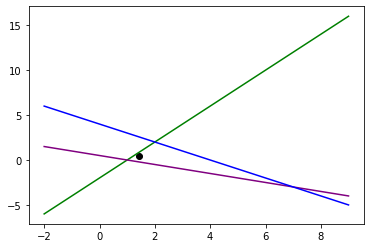

In [94]:
x=np.linspace(-2,9,100000)
solution = Jacobi(Matriz,b,x0)
plt.plot(x,l1(x), color='green')
plt.plot(x,l2(x),color='purple')
plt.plot(x,l3(x), color='blue')
plt.scatter(solution[0],solution[1],color='k',label='Punto solución')

b)

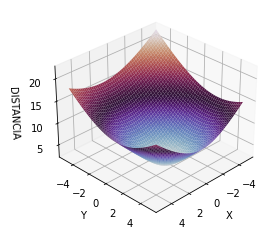

In [95]:
X=np.arange(-5,5,0.01)
Y=np.arange(-5,5,0.01)


dist=np.zeros((len(X),len(Y)))

for i in range(len(X)):
    for j in range(len(Y)):

        dot=np.dot(Matriz,np.array([X[i],Y[j]]))-b
        each=np.linalg.norm(dot)
        
        dist[i][j]=each

        
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X,Y,dist,cmap='twilight')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('DISTANCIA')
ax.view_init(elev=30, azim=45)




In [96]:
dist

array([[22.38302929, 22.365612  , 22.34820798, ..., 17.88142612,
        17.89308246, 17.90476473],
       [22.36337631, 22.34594818, 22.32853332, ..., 17.86240185,
        17.8740762 , 17.88577647],
       [22.3437329 , 22.32629392, 22.30886819, ..., 17.84339093,
        17.85508331, 17.86680162],
       ...,
       [14.83392733, 14.81436465, 14.79481666, ..., 15.41403906,
        15.43402086, 15.45401566],
       [14.84460845, 14.82506661, 14.8055395 , ..., 15.43078093,
        15.45074755, 15.4707272 ],
       [14.85532228, 14.83580129, 14.81629508, ..., 15.44754349,
        15.46749495, 15.48745944]])

6.

Para $X^2(a_{0},a_{1})= \sum_{i=1}^n (y_{i} - (a_{0}+a_{1}x_{i}))^2$:

$$\frac{\partial x^2}{\partial a_{0}}= -2 \sum_{i=1}^n (y_{i} -a_{0} - a_{1}x_{i})$$


$$\frac{\partial x^2}{\partial a_{1}}= -2 \sum_{i=1}^n x_{i}(y_{i} -a_{0} - a_{1}x_{i})$$


Si se minimiza se obtiene para $a_{0}$:

$$ -2(\vec y -a_{0} -a_{1}\vec x)=0$$
$$ \vec y -a_{0} -a_{1}\vec x =0$$
$$a_{0} = \vec y - a_{1}\vec x$$

Y para $a_{1}$:

$$-2 \sum_{i=1}^n x_{i}(y_{i} -a_{0} - a_{1}x_{i})=0$$
$$-2 \sum_{i=1}^n x_{i}(y_{i} -\vec y + a_{1}\vec x - a_{1}x_{i})=0$$
$$ \sum _{i=1}^n x_{i}(y_{i}-\vec y) + a_{1}\sum_{i=1}^n x_{i}\vec x - a_{1} \sum_{i=1}^n x_{i}^2=0$$
$$a_{1}\Big(\sum_{i=1}^n x_{i}\vec x -\sum_{i=1}^n x_{i}^2 \Big)= - \sum_{i=1}^n x_{i}(y_{i} - \vec y)$$
$$ $$
$$a_{1}= \frac{\sum_{i=1}^n x_{i}(y_{i} - \vec y)}{\sum_{i=1}^n x_{i}^2 - \sum_{i=1}^n x_{i}\vec x}$$
$$ $$
$$a_{1}= \frac{\sum xy - \frac{\sum x \sum y }{n}}{\sum x^2 - \frac{(\sum x)^2}{n}}$$



Para $X^2(a_{0},a_{1},a_{2})= \sum_{i=1}^n (y_{i} - (a_{0}+a_{1}x_{i}+ a_{2}x_{i}^2))^2$:

$$\frac{\partial x^2}{\partial a_{0}}= -2 \sum_{i=1}^n (y_{i} -a_{0} - a_{1}x_{i}-a_{2}x_{i}^2)$$
$$\frac{\partial x^2}{\partial a_{1}}= -2 \sum_{i=1}^n x_{i}(y_{i} -a_{0} - a_{1}x_{i}-a_{2}x_{i}^2)$$
$$\frac{\partial x^2}{\partial a_{2}}= -2 \sum_{i=1}^n x_{i}^2(y_{i} -a_{0} - a_{1}x_{i}-a_{2}x_{i}^2)$$

De modo que se obtiene el siguiente sistema de ecuaciones:

$$ \sum _{i=1}^n [a_{0} +x_{i}a_{1}+ x_{i}^2a_{2} ]= \sum_{i=1}^n y_{i}$$

$$ \sum _{i=1}^n [a_{0}x_{i} +x_{i}^2a_{1}+ x_{i}^3a_{2} ]= \sum_{i=1}^n y_{i}x_{i}$$

$$ \sum _{i=1}^n [a_{0}x_{i}^2 +x_{i}^3a_{1}+ x_{i}^3a_{2} ]= \sum_{i=1}^n y_{i}x_{i}^2$$

$$ $$
$$ $$

$$ \sum _{i=1}^n [a_{0} +x_{i}a_{1}+ x_{i}^2a_{2} = y_{i}]$$

$$ \sum _{i=1}^n [a_{0}x_{i} +x_{i}^2a_{1}+ x_{i}^3a_{2} =  y_{i}x_{i}]$$

$$ \sum _{i=1}^n [a_{0}x_{i}^2 +x_{i}^3a_{1}+ x_{i}^4a_{2} = y_{i}x_{i}^2]$$


7.

a)

In [97]:
def cargar(nombre:str)->tuple:
    archivo=open(nombre,mode='r',encoding=("utf8"))
    llaves=archivo.readline().strip()
    linea=archivo.readline().strip()
    y=[]
    x=[]
    
    while len(linea)>0:
        datos=linea.split(",")
        datos[0]
        x.append(float(datos[0]))
        y.append(float(datos[1]))
          
        linea=archivo.readline()
        
    archivo.close()

    return  (x,y)

In [98]:
X,Y=cargar('Sigmoid.txt')


In [99]:
angulo0=sym.symbols("angulo0",real=True)
angulo1=sym.symbols("angulo1",real=True)
angulo2=sym.symbols("angulo2",real=True)
x=sym.symbols("x", real=True)
def modelo_de_ajuste():
    ajuste= angulo0/(angulo1+sym.exp(-angulo2*x))
    return ajuste


b)

In [100]:
def funcion_costo(x,y,angulo):
    suma=0
    n=0
    while n<len(x):
        suma+=(y[n]-modelo_de_ajuste(x,angulo))**2
        n+=1
    return suma

c)

A partir de la métrica dada por:

$$x^2(\vec \theta)= \sum_{i=1}^N \Big(\frac{y_{i} - M(x_{i}, \vec\theta)}{\sigma_{i}}\Big) ^2$$

Sus derivadas parciales estarían dadas por:

$$\frac{\partial x^2(\vec{\theta})}{\partial \theta_{i}} = \sum_{i=1}^N 2(y_{i} - M(x_{i},\vec\theta)) \Big(-\frac{\partial M(x_{i},\vec\theta)}{\partial \theta_{i}} \Big)$$

$$= -2 \sum_{i=1}^N (y_{i} - M(x_{i},\vec\theta)) \frac{\partial M(x_{i},\vec\theta)}{\partial \theta_{i}} $$


d)

De acuerdo con el método de descenso gradiente, se tiene que se debe ir en contra del gradiente a una tasa de aprendizaje $\gamma$, dado por la siguiente ecuación:

$$\vec x^1=\vec x^0 - \gamma \nabla \vec F(\vec x_{0})$$

De modo que aplicándolo al modelo de ajuste y dadas las derivadas parciales halladas previamente en el inciso c, se obtiene que:

$$\vec \theta _{j+1} =\vec \theta _{j} - \gamma \Big(\frac {\partial x^2 (\vec \theta)}{\partial \theta_{i}} \Big)$$

$$ \vec \theta _{j+1} =\vec \theta _{j} - \gamma \Big(-2 \sum_{i=1}^N (y_{i} - M(x_{i},\vec\theta)) \frac{\partial M(x_{i},\vec\theta)}{\partial \theta_{i}}\Big)$$ 

$$ \vec \theta _{j+1} =\vec \theta _{j} - \gamma \Big(-2 \sum_{i=1}^N (y_{i} - M(x_{i},\vec\theta)) \nabla _{\theta} M(x_{i},\vec\theta)\Big)$$ 



e)

In [101]:
def gradiente():
    grad0=sym.lambdify([x,angulo0,angulo1,angulo2],sym.diff(modelo_de_ajuste(),angulo0))
    grad1=sym.lambdify([x,angulo0,angulo1,angulo2],sym.diff(modelo_de_ajuste(),angulo1))
    grad2=sym.lambdify([x,angulo0,angulo1,angulo2],sym.diff(modelo_de_ajuste(),angulo2))
    return grad0,grad1,grad2


In [102]:
def gradiente_decendiente(funcion,x,y,angulo,interaciones,parada,aprendizaje):
    error=parada+1
    n=0
    grad0, grad1,grad2=gradiente()

    while error>parada and n<interaciones:
        suma=0
        for i in range(len(y)):
            dgrad0=grad0(x[i],angulo[0],angulo[1],angulo[2])
            dgrad1=grad1(x[i],angulo[0],angulo[1],angulo[2])
            dgrad2=grad2(x[i],angulo[0],angulo[1],angulo[2])
            suma+=(y[i]-funcion(x[i],angulo[0],angulo[1],angulo[2]))*np.array([dgrad0,dgrad1,dgrad2])
        angulonuevo=angulo-(-2*aprendizaje*suma)
        angulo=angulonuevo
        error=np.linalg.norm(-2*aprendizaje*suma)
        n+=1
    return angulonuevo

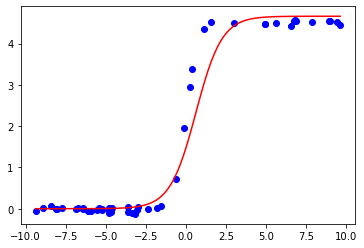

In [103]:
funcion=sym.lambdify([x,angulo0,angulo1,angulo2],modelo_de_ajuste())
angulo=[1,1,1]
interaciones= 10000
parada=0.01
aprendizaje= 0.001
nuevo=gradiente_decendiente(funcion,X,Y,angulo,interaciones,parada,aprendizaje)
x2=np.linspace(np.min(X),np.max(X),100)
y2=[]
for i in x2:
    new=nuevo[0]/ (nuevo[1]+ sym.exp(-1*nuevo[2]*i))
    y2.append(new)
plt.plot(x2,y2,color="red")
plt.scatter(X,Y,color="blue")
